<a href="https://colab.research.google.com/github/vanessaaleung/trumpstwitter/blob/master/twitter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import and Clean Data

In [2]:
import pandas as pd

url = 'https://raw.githubusercontent.com/vanessaaleung/trumpstwitter/master/trumpstwitter.csv'
df = pd.read_csv(url)

df1 = df.drop(columns = ['source', 'retweet_count', 'favorite_count', 'is_retweet'])
df1['created_at'] = df1['created_at'].str.extract('(([0-9]+-[0-9]+-)\w+)', expand=True)
df1.rename(columns={'created_at': 'Date'}, inplace=True)
df1.count()

text      4011
Date      4011
id_str    4011
dtype: int64

In [3]:
df2 = pd.DataFrame()

dic = ["China", "Chinese", "Beijing", "President Xi", "Hong Kong", "Taiwan", "trade war"]

for key in dic:
  for text in df1['text']:
    if key in text:
      df2 = df2.append(df1[df1['text'] == text])

df2.count()

text      210
Date      210
id_str    210
dtype: int64

# Sentiment Analysis

In [0]:
from google.cloud import language
from google.cloud.language import enums
from google.cloud.language import types # type contains classes that are required for creating requests

In [5]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="drive/My Drive/Colab Notebooks/twitter/Sentiment Analysis-f8443955d634.json"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
client = language.LanguageServiceClient()

import time
score = []
count = 0
nexcept = 0

for text in df1['text']:
  try:
    document = types.Document(
          content=text,
          type=enums.Document.Type.PLAIN_TEXT)
    annotations = client.analyze_sentiment(document=document)
    score.append(annotations.document_sentiment.score)
  except:
    score.append(0)
    nexcept += 1
  count += 1
  if count / 500 == 0:
    time.sleep(60)

df1['score'] = score

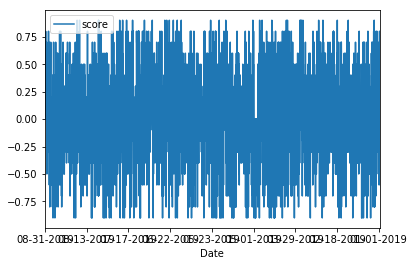

In [8]:
df1.plot(x = "Date", y = "score")

In [0]:
score = []
count = 0

for text in df2['text']:
  try:
    document = types.Document(
          content=text,
          type=enums.Document.Type.PLAIN_TEXT)
    annotations = client.analyze_sentiment(document=document)
    score.append(annotations.document_sentiment.score)
  except:
    score.append(0)
    nexcept += 1
  count += 1
  if count / 500 == 0:
    time.sleep(60)

df2['score'] = score

In [0]:
gb = df1.groupby('Date')
gb2 = df2.groupby('Date')

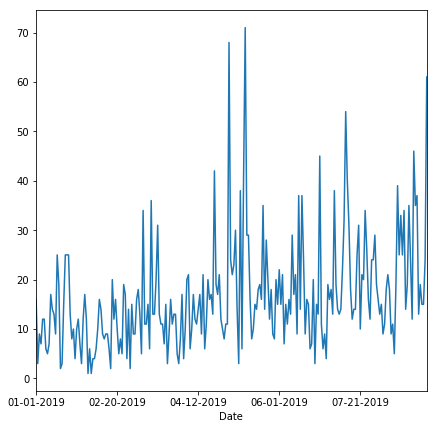

In [19]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(7,7))
gb.count()['score'].plot(ax=ax)

In [0]:
gb2.count()['score'].plot(ax=ax)

# Exchange Rate

In [7]:
exdata = pd.read_csv("https://raw.githubusercontent.com/vanessaaleung/trumpstwitter/master/Exchange_Rate_Report.csv")
exdata.head()

,Date,Exchange Rate
0,01-02-2019,6.8557
1,01-03-2019,6.8744
2,01-04-2019,6.8647
3,01-07-2019,6.8498
4,01-08-2019,6.86


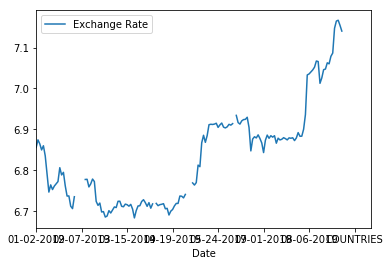

In [9]:
exdata['Exchange Rate'] = pd.to_numeric(exdata['Exchange Rate'], errors = 'coerce')
exdata.plot(x = 'Date', y = 'Exchange Rate')

In [0]:
df_merge = pd.merge(df1, exdata, on='Date')
df_merge2 = pd.merge(df2, exdata, on='Date')

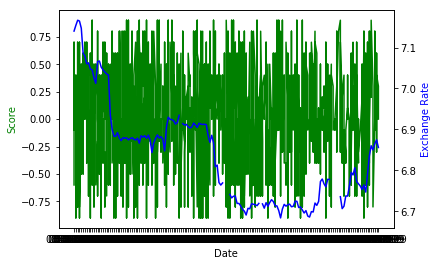

In [12]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.plot(df_merge['Date'], df_merge['score'], 'g-')
ax2.plot(df_merge['Date'], df_merge['Exchange Rate'], 'b-')

ax1.set_xlabel('Date')
ax1.set_ylabel('Score', color='g')
ax2.set_ylabel('Exchange Rate', color='b')

plt.show()

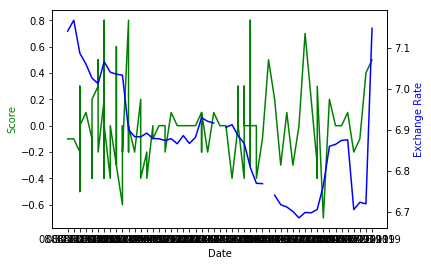

In [24]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.plot(df_merge2['Date'], df_merge2['score'], 'g-')
ax2.plot(df_merge2['Date'], df_merge2['Exchange Rate'], 'b-')

ax1.set_xlabel('Date')
ax1.set_ylabel('Score', color='g')
ax2.set_ylabel('Exchange Rate', color='b')

plt.show()

In [13]:
df_merge.corr()

,id_str,score,Exchange Rate
id_str,1.000000,-0.016506,0.816703
score,-0.016506,1.000000,-0.022663
Exchange Rate,0.816703,-0.022663,1.000000
